In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
import os 
from keras.models import Sequential 
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from PIL import Image
from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
def thai_label_conversion(label) :
  # Leng Lohanakakul 11/7/2022
  # This function converts an integer label of the image to the string equivalent classes 
  # Function input: 
  # label: an integer number specifying the classes of the image 
  # Function output: 
  # returns a string equivalent of the label of the image
  if label == 0 : 
    return "20 Thai Baht"
  elif label == 1: 
    return "50 Thai Baht"
  elif label == 2: 
    return "100 Thai Baht" 
  elif label == 3: 
    return "500 Thai Baht" 
  elif label == 4: 
    return "1000 Thai Baht" 

In [4]:
def load_thai_data(directory, getIndividual=None): 
  # Leng Lohanakakul 11/7/2022
  # This function loads the thai dataset from the image folder 
  # do the transformation to the image (resizing and normalizing) 
  # then split the image into training and testing dataset
  # Function inputs: 
  # directory: the path of the folder that contains all the thai images
  # getIndividual: a boolean specifiying which kind of data should be returned

  # image and label for each classes of bank notes
  img_20 = [] 
  lbl_20 = [] 
  img_50 = [] 
  lbl_50 = [] 
  img_100 = [] 
  lbl_100 = [] 
  img_500 = [] 
  lbl_500 = [] 
  img_1000 = [] 
  lbl_1000 = [] 
  # initialize the training size 
  training_size = 0.8

  for image_class in os.listdir(directory) : 
    for image_name in os.listdir(os.path.join(directory, image_class)):
      # open the image at the image file path
      image = Image.open(os.path.join(directory, image_class, image_name))
      # resize the image to 32x32
      image.thumbnail((128,128)) 
      # normalize the image
      image = np.array(image) / 255 
      if image_class == "THAI_20": # if the image belongs to 20 thai baht 
        lbel = 0
        img_20.append(image)
        lbl_20.append(lbel) 
      elif image_class == "THAI_50": # if the image belongs to 50 thai baht 
        lbel = 1
        img_50.append(image) 
        lbl_50.append(lbel) 
      elif image_class == "THAI_100": # if the image belongs to 100 thai baht 
        lbel = 2
        img_100.append(image) 
        lbl_100.append(lbel) 
      elif image_class == "THAI_500": # if the image belongs to 500 thai baht 
        lbel = 3
        img_500.append(image)
        lbl_500.append(lbel)       
      elif image_class == "THAI_1000": # if the image belongs to 1000 thai baht 
        lbel = 4
        img_1000.append(image) 
        lbl_1000.append(lbel) 

  # equally split the dataset into train and test for each classes of images
  thai20_img_train, thai20_img_test, thai20_label_train, thai20_label_test = train_test_split(img_20, lbl_20, train_size=training_size) 
  thai50_img_train, thai50_img_test, thai50_label_train, thai50_label_test = train_test_split(img_50, lbl_50, train_size=training_size) 
  thai100_img_train, thai100_img_test, thai100_label_train, thai100_label_test = train_test_split(img_100, lbl_100, train_size=training_size) 
  thai500_img_train, thai500_img_test, thai500_label_train, thai500_label_test = train_test_split(img_500, lbl_500, train_size=training_size) 
  thai1000_img_train, thai1000_img_test, thai1000_label_train, thai1000_label_test = train_test_split(img_1000, lbl_1000, train_size=training_size) 
  
  # combine the data together into train and test set
  x_train = np.vstack([thai20_img_train, thai50_img_train, thai100_img_train, thai500_img_train, thai1000_img_train])
  y_train = np.hstack([thai20_label_train, thai50_label_train, thai100_label_train, thai500_label_train, thai1000_label_train])
  x_test = np.vstack([thai20_img_test, thai50_img_test, thai100_img_test, thai500_img_test, thai1000_img_test])
  y_test = np.hstack([thai20_label_test, thai50_label_test, thai100_label_test, thai500_label_test, thai1000_label_test])

  if getIndividual: # returns the individual training and testing set for each classes
     return np.array(thai20_img_test), np.array(thai20_label_test), np.array(thai50_img_test), np.array(thai50_label_test), np.array(thai100_img_test), np.array(thai100_label_test), np.array(thai500_img_test), np.array(thai500_label_test), np.array(thai1000_img_test), np.array(thai1000_label_test)
  else : # returns the combined training and testing set for all classes 
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test) 


In [5]:
# Leng Lohanakakul 11/7/2022
# Main function for loading the combined and individual dataset

data_dir = '/content/drive/MyDrive/VIP/Thai Currencies'

# load the dataset and split it into train and test set 
x_thai_train, y_thai_train, x_thai_test, y_thai_test = load_thai_data(data_dir, False)
thai20_img_test, thai20_label_test, thai50_img_test, thai50_label_test, thai100_img_test, thai100_label_test, thai500_img_test, thai500_label_test, thai1000_img_test, thai1000_label_test = load_thai_data(data_dir, True)

# number of training and testing dataset 
print(f"number of Thai training images = {y_thai_train.shape[0]}")
print(f"number of Thai testing images = {y_thai_test.shape[0]}")

number of Thai training images = 800
number of Thai testing images = 200


In [6]:
# Leng Lohanakakul 11/15/2022
# This code block augment the data to increase its training size 
datagen_thai_train = ImageDataGenerator(width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             zoom_range = 0.1, 
                             fill_mode = 'nearest',
                             vertical_flip=True,
                             )
datagen_thai_train.fit(x_thai_train) 

In [7]:
# Leng Lohanakakul 11/7/2022
# Define a convolutional neural network that takes an input shape of 128x128x3
cnn = Sequential() 
cnn.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(128,128,3), name='conv1'))
cnn.add(Conv2D(64, kernel_size=3, activation='relu', name='conv2'))
cnn.add(MaxPool2D(pool_size=(4,4), name='pool2'))
cnn.add(Flatten(name='flat'))
cnn.add(Dense(5, activation='softmax', name='output'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 126, 126, 32)      896       
                                                                 
 conv2 (Conv2D)              (None, 124, 124, 64)      18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 31, 31, 64)        0         
                                                                 
 flat (Flatten)              (None, 61504)             0         
                                                                 
 output (Dense)              (None, 5)                 307525    
                                                                 
Total params: 326,917
Trainable params: 326,917
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Leng Lohanakakul 11/7/2022
# Main function for compiling the model and defining the hyperparameters 

# define the optimizer and loss function used for the neural network
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train the model with training dataset over n_epochs 
n_epochs = 10 
# training = cnn.fit(x_thai_train, y_thai_train, epochs=10)
training = cnn.fit(datagen_thai_train.flow(x_thai_train, y_thai_train), epochs=10)

Epoch 1/10
25/25 [==============================] - 12s 117ms/step - loss: 1.7768 - accuracy: 0.2250
Epoch 2/10
25/25 [==============================] - 3s 122ms/step - loss: 1.6059 - accuracy: 0.2338
Epoch 3/10
25/25 [==============================] - 3s 123ms/step - loss: 1.6016 - accuracy: 0.2500
Epoch 4/10
25/25 [==============================] - 3s 121ms/step - loss: 1.5593 - accuracy: 0.2637
Epoch 5/10
25/25 [==============================] - 3s 121ms/step - loss: 1.5172 - accuracy: 0.2900
Epoch 6/10
25/25 [==============================] - 3s 122ms/step - loss: 1.4658 - accuracy: 0.3275
Epoch 7/10
25/25 [==============================] - 5s 181ms/step - loss: 1.4394 - accuracy: 0.3537
Epoch 8/10
25/25 [==============================] - 3s 121ms/step - loss: 1.3957 - accuracy: 0.3638
Epoch 9/10
25/25 [==============================] - 3s 123ms/step - loss: 1.2967 - accuracy: 0.4375
Epoch 10/10
25/25 [==============================] - 3s 121ms/step - loss: 1.2589 - accuracy: 0.447

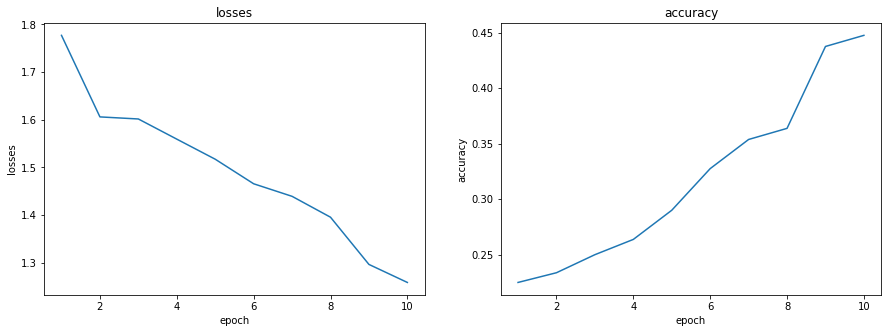

In [9]:
# Leng Lohanakakul 11/7/2022
# This code block displays the performance of the neural network trained over n_epochs
# Measures loss value and accuracy to evalute the performance of cnn 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5), squeeze=False) 
# plot the loss value over n_epochs 
ax[0,0].plot(range(1,n_epochs+1), training.history['loss'])
ax[0,0].set_title("losses")
ax[0,0].set_xlabel('epoch') 
ax[0,0].set_ylabel('losses')
# plot the accuracy over n_epochs
ax[0,1].plot(range(1,n_epochs+1), training.history['accuracy'])
ax[0,1].set_title("accuracy")
ax[0,1].set_xlabel('epoch') 
ax[0,1].set_ylabel('accuracy')

plt.show() 

In [10]:
# Leng Lohanakakul 11/7/2022
# This code block evaluate the accuracy of the cnn on each testing dataset

# predict the model with testing dataset
predict = cnn.predict(x_thai_test)

# evaluate the total accuracy of the cnn 
score = cnn.evaluate(x_thai_test, y_thai_test) 
print(f"Test accuracy of the neural network = {score[1] * 100} %")

# evaluate accuracy of 20 baht in testing dataset
score = cnn.evaluate(thai20_img_test,thai20_label_test)
print(f"20 Thai Baht Test Accuracy = {score[1] * 100} %")

# evaluate accuracy of 50 baht in testing dataset
score = cnn.evaluate(thai50_img_test,thai50_label_test)
print(f"50 Thai Baht Test Accuracy = {score[1] * 100} %")

# evaluate accuracy of 100 baht in testing dataset
score = cnn.evaluate(thai100_img_test,thai100_label_test)
print(f"100 Thai Baht Test Accuracy = {score[1] * 100} %")

# evaluate accuracy of 500 baht in testing dataset
score = cnn.evaluate(thai500_img_test,thai500_label_test)
print(f"500 Thai Baht Test Accuracy = {score[1] * 100} %")

# evaluate accuracy of 1000 baht in testing dataset
score = cnn.evaluate(thai1000_img_test,thai1000_label_test)
print(f"1000 Thai Baht Test Accuracy = {score[1] * 100} %")

7/7 [==============================] - 0s 14ms/step - loss: 1.2574 - accuracy: 0.4700
Test accuracy of the neural network = 46.99999988079071 %
2/2 [==============================] - 0s 9ms/step - loss: 0.9885 - accuracy: 0.6500
20 Thai Baht Test Accuracy = 64.99999761581421 %
2/2 [==============================] - 0s 10ms/step - loss: 1.5365 - accuracy: 0.3750
50 Thai Baht Test Accuracy = 37.5 %
2/2 [==============================] - 0s 9ms/step - loss: 0.8214 - accuracy: 0.7000
100 Thai Baht Test Accuracy = 69.9999988079071 %
2/2 [==============================] - 0s 10ms/step - loss: 1.0144 - accuracy: 0.4500
500 Thai Baht Test Accuracy = 44.999998807907104 %
2/2 [==============================] - 0s 10ms/step - loss: 1.4589 - accuracy: 0.3250
1000 Thai Baht Test Accuracy = 32.499998807907104 %


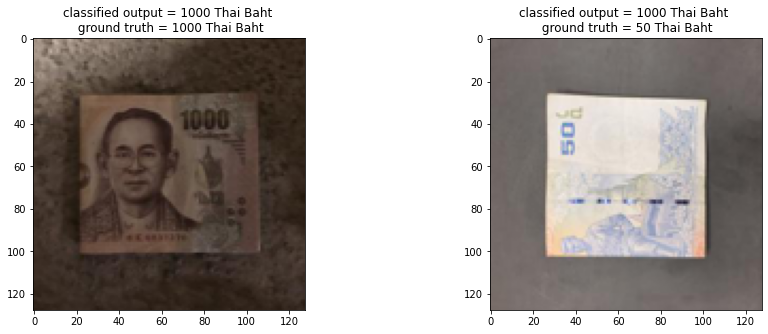

In [11]:
# Leng Lohanakakul 11/7/2022
# This code block display an example of correctly and incorrectly classified images 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5), squeeze=False) 

# show an example of correcly classified image
for i in range(y_thai_test.shape[0]): 
  j = random.randint(0,199) 
  predicted = np.argmax(predict[j]) 
  if thai_label_conversion(predicted) == thai_label_conversion(y_thai_test[j]): 
    ax[0,0].imshow(np.squeeze(x_thai_test[j]), cmap="gray")
    ax[0,0].set_title(f"classified output = {thai_label_conversion(predicted)} \n ground truth = {thai_label_conversion(y_thai_test[j])}") 
    break

# show an example of misclassified image
for i in range(y_thai_test.shape[0]): 
  j = random.randint(0,199) 
  predicted = np.argmax(predict[j]) 
  if thai_label_conversion(predicted) != thai_label_conversion(y_thai_test[j]): 
    ax[0,1].imshow(np.squeeze(x_thai_test[j]), cmap="gray")
    ax[0,1].set_title(f"classified output = {thai_label_conversion(predicted)} \n ground truth = {thai_label_conversion(y_thai_test[j])}")
    plt.show() 
    break